In [20]:
import sys

from scipy.optimize import curve_fit

sys.path.append("../../src")

from relaxnmr.core import T1Functions

import numpy as np

import matplotlib.pyplot as plt

In [21]:
filepath = r"..\..\data\T2_cpmg_data\38\\"

t1 = T1Functions(filepath)

In [22]:
spectra, vd_list, csdm_ds = t1.read_and_convert_bruker_data(filepath)

In [23]:
#process each spectrum in the saved spectra and save spectra as exp_spectra

exp_spectra = []
for i, spectrum in enumerate(spectra):
    
    if i == 0:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=285, ph1=0.195)
        exp_spectra.append(exp_spectrum)
    elif i == 1:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=295, ph1=0.1948)
        exp_spectra.append(exp_spectrum)
    elif i == 2:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=290, ph1=0.1948)
        exp_spectra.append(exp_spectrum)
    elif i == 3:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=285, ph1=0.195)
        exp_spectra.append(exp_spectrum)
    elif i == 4:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=280, ph1=0.195)
        exp_spectra.append(exp_spectrum)
    elif i == 5:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=280, ph1=0.1948)
        exp_spectra.append(exp_spectrum)
    elif i == 6:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=290, ph1=0.1948)
        exp_spectra.append(exp_spectrum)
    elif i == 7:
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=290, ph1=0.195)
        exp_spectra.append(exp_spectrum)
    else :
        exp_spectrum = t1.process_spectrum(spectrum, fwhm="50 Hz", zero_fill_factor=10, ph0=292, ph1=0.1948)
        exp_spectra.append(exp_spectrum)

In [24]:

#integrate ppm region of interest in each spectrum using "integrate_spectrum_region" function

"""The integration function employed here integrate each spectrum using trapezoid and simpson function, respectively.
ppm_start and ppm_end need to be defined as the starting and ending ppm region needed to be integrated. 
The integrated area of each spectrum is appended to trapz_ints and simps_ints, respectively.
x_ and y_regions are regions of integration in the spectra -- needed for visuals"""

trapz_ints = []
simps_ints = []
x_regions = []
y_regions = []
int_uncs = []
for i, exp_spectrum in enumerate(exp_spectra):
    trapz_int, simps_int, x_region, y_region, int_unc = t1.integrate_spectrum_region(exp_spectrum, 
                                                                                     ppm_start=-15, ppm_end=15)
    trapz_ints.append(trapz_int)
    simps_ints.append(simps_int)
    x_regions.append(x_region)
    y_regions.append(y_region)
    int_uncs.append(int_unc)
    

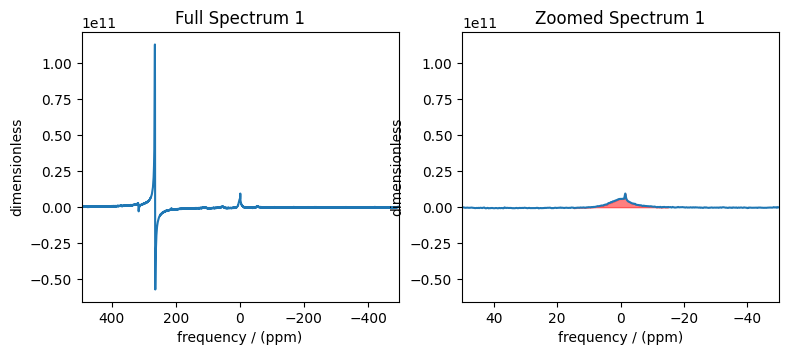

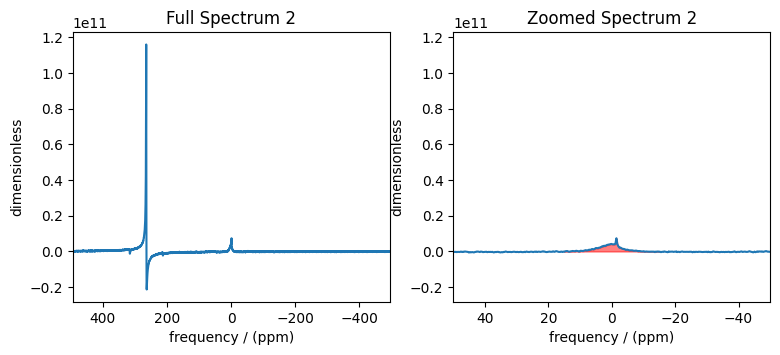

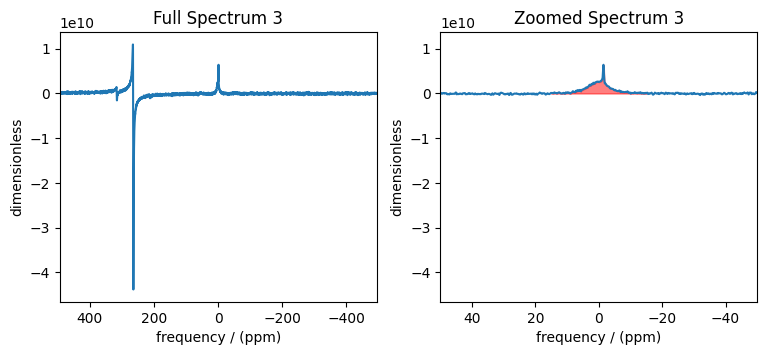

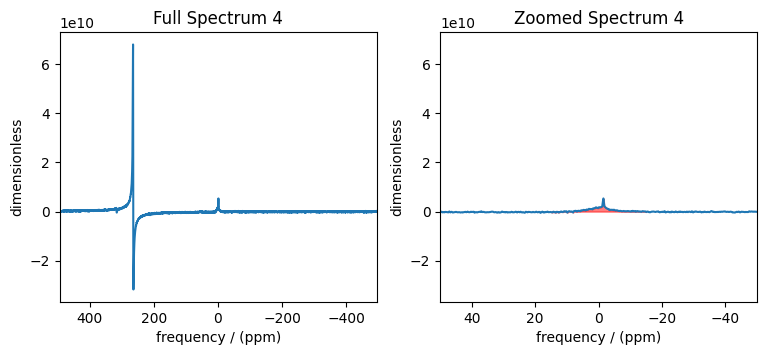

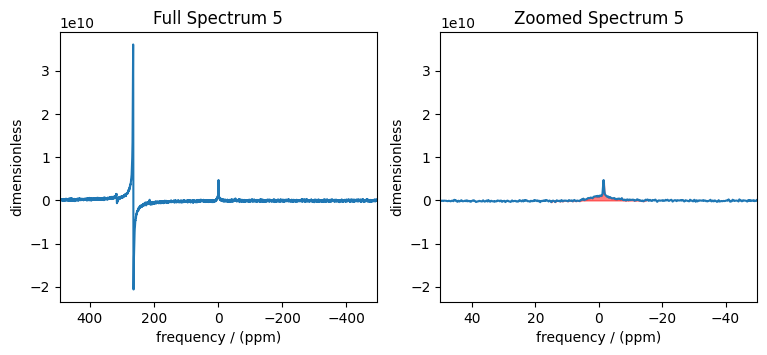

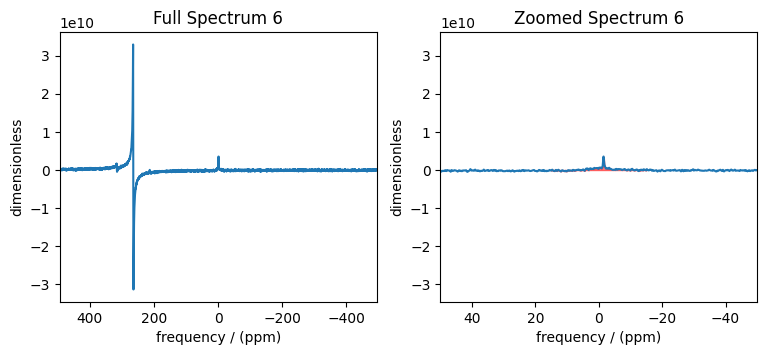

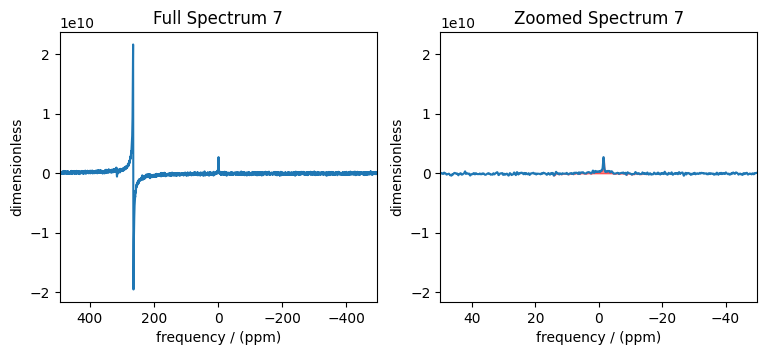

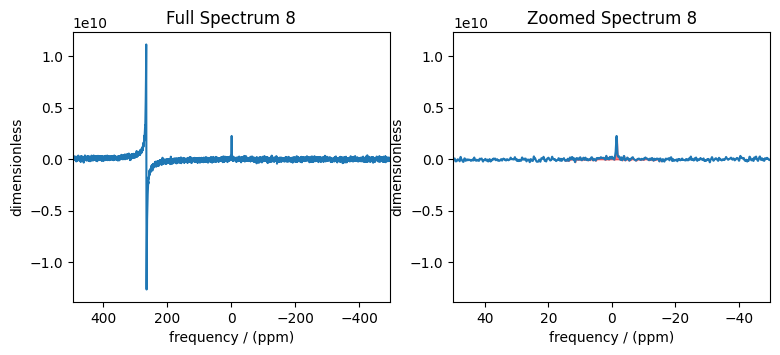

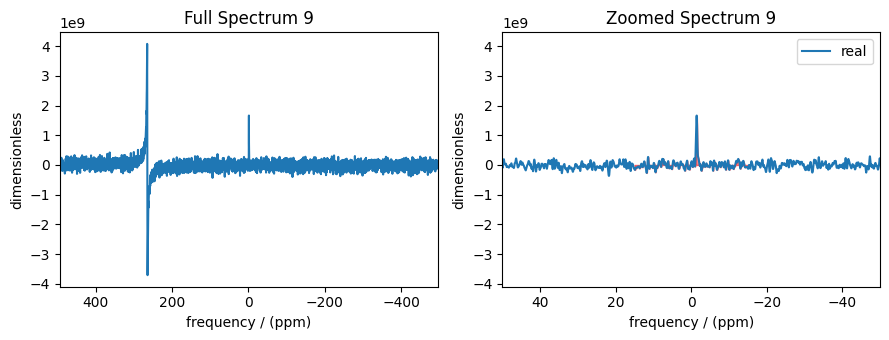

In [25]:
abs_ints = t1.plot_spectra_and_zoomed_regions(exp_spectra, x_regions, y_regions, 50, -50)

In [26]:
#vd_list imported from the file_path and converted into a numpy array

vd_list = np.array(vd_list)

# print(len(vd_list))
# # slicing the vd_list if some data points are shitty
# vd_list = vd_list[:]
# 

vd_list = vd_list * 2 * 4.86 * 10**-6

print(vd_list)

[1.94400e-05 3.88800e-05 7.77600e-05 1.55520e-04 3.11040e-04 6.22080e-04
 1.24416e-03 2.48832e-03 4.97664e-03]


In [27]:
# # slicing the intensities if some data points are shitty

simps_ints = simps_ints[:len(vd_list)]

abs_ints = abs_ints[:len(vd_list)]


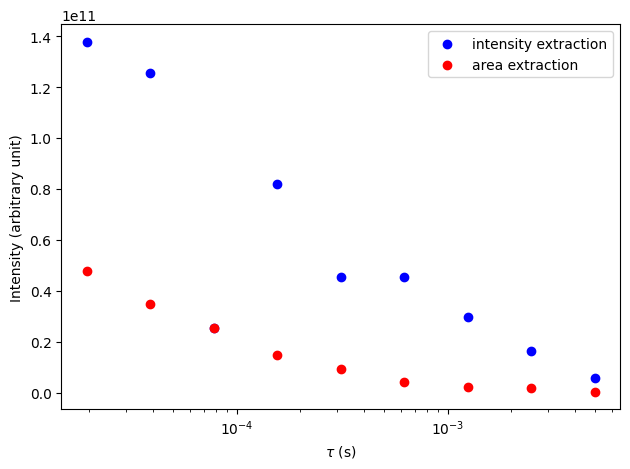

In [28]:
fig, ax = plt.subplots()

ax.scatter(vd_list, abs_ints, color='blue', label='intensity extraction')


ax.scatter(vd_list, simps_ints, color='red', label='area extraction')
# ax.errorbar(vd_list, simps_ints, yerr=int_uncs, fmt='o', color='red', label='error')

# ax.semilogy()

ax.semilogx()

ax.legend(loc='best', frameon=True)

ax.set_xlabel(r'$\tau$ (s)')
ax.set_ylabel('Intensity (arbitrary unit)')



plt.tight_layout()

plt.show()

T1_simps_area: 0.00010217635214086735 ± 2.1174008518649647e-05
A_simps_area: 1604701008.464661 ± 2.355204036413354e+16
B_simps_area: 31.574675822333777 ± 463975120.531155
C_simps_area: 2999344350.029867 ± 1426611309.6305165


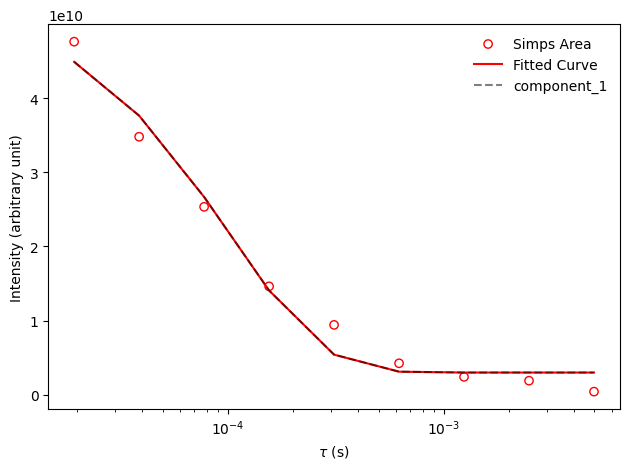

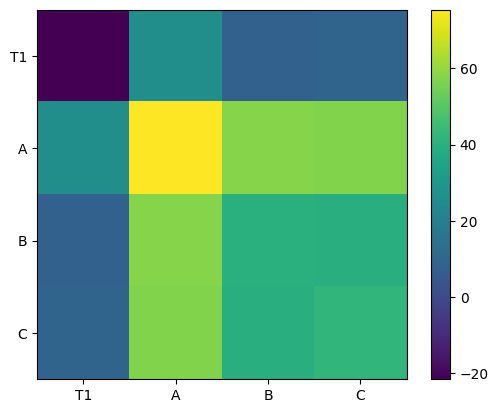

<Figure size 640x480 with 0 Axes>

In [29]:
#T1rho fitting

fig, ax = plt.subplots()
output_lines = []
# Define a list of tuples for the two sets of intensities
intensity_sets = [
    (simps_ints, 'Simps Area', 'Guess Curve', 'Fitted Curve', 'r'),
    (abs_ints, 'Absolute Intensities', 'Guess Abs Int Curve', 'Fitted Curve Absolute Intensity', 'b')
]


# Initial guess parameters

T1_guess = 10.6 * 10**-3





for i, (ints, label, guess_label, fitted_label, color) in enumerate(intensity_sets):
    if i ==0:
        # A_guess = np.max(ints)
        A_guess = 747197159
        
        B_guess = 43
        
        C_guess = np.min(ints)
        
        
    
    # Scatter plot
        # ax.scatter(vd_list, ints, color=color, label=label)
    #scatter plot with marker having no face color
        ax.scatter(vd_list, ints, color=color, marker='o', facecolors='none', label=label)
    
    # Guess curve
        guess_integrated_int = t1.mono_expdec(vd_list, T1_guess, A_guess, B_guess, C_guess)
        # guess_integrated_int = t1.expdec(vd_list, T1_guess, T2_guess, T3_guess, A_guess, B_guess)
        
        # ax.plot(vd_list, guess_integrated_int, color='brown', linestyle='--', label=guess_label, alpha=0.9)
    
    # Fit the data
        popt, pcov = curve_fit(t1.mono_expdec, vd_list, ints, p0=[T1_guess, A_guess, B_guess, C_guess])
    
    # Save the fitted params and uncertainties
        T1_fitted, A_fitted, B_fitted, C_fitted = popt
        T1_unc, A_unc, B_unc, C_unc = np.sqrt(np.diag(pcov))
        
        #define T1 and T2
        component_1 = A_fitted *  (B_fitted)*np.exp(-vd_list/T1_fitted) + C_fitted
        

    
    # Extract the fitted curve
    
        fitted_curve = t1.mono_expdec(vd_list,T1_fitted, A_fitted, B_fitted, C_fitted)
        ax.plot(vd_list, fitted_curve, linestyle='-', color=color, label=fitted_label)
        # ax.scatter(vd_list, fitted_curve, color='black', marker='o', facecolors='none', label=fitted_label)
        ax.plot(vd_list, component_1, linestyle='--', color='black', alpha=0.5, label='component_1')

      

    
    # print the fitted parameters and uncertainties
        print(f'T1_{label.lower().replace(" ", "_")}: {T1_fitted} ± {T1_unc}')
     
    
        print(f'A_{label.lower().replace(" ", "_")}: {A_fitted} ± {A_unc}')
        print(f'B_{label.lower().replace(" ", "_")}: {B_fitted} ± {B_unc}')
        print(f'C_{label.lower().replace(" ", "_")}: {C_fitted} ± {C_unc}')

    
    # #Format the string and append fitted parameters
        
        output_lines.append(f'M0_{label.lower().replace(" ", "_")}: {A_fitted} ± {A_unc}\n')
        output_lines.append(f'T1_{label.lower().replace(" ", "_")}: {T1_fitted} ± {T1_unc}\n')

 
        output_lines.append(f'B_{label.lower().replace(" ", "_")}: {B_fitted} ± {B_unc}\n')
        output_lines.append(f'C_{label.lower().replace(" ", "_")}: {C_fitted} ± {C_unc}\n')
       
        #save the fitted params and uncertainties in a text file
        with open(filepath+'mono_exp_fitted_params.txt', 'w') as f:
            f.writelines(output_lines)


# ax.semilogy()
ax.semilogx()
ax.legend(loc='best', frameon=False)
ax.set_xlabel(r'$\tau$ (s)')
ax.set_ylabel('Intensity (arbitrary unit)')


#plot the covariance matrix in another figure and label the axes with the fitted parameters


plt.savefig(filepath+'mono_exp_T1_fitting.svg', bbox_inches='tight', transparent=True)
plt.tight_layout()
fig, ax = plt.subplots()
im = ax.imshow(np.log(np.abs(pcov)))
ax.set_xticks(np.arange(len(popt)))
ax.set_yticks(np.arange(len(popt)))
ax.set_xticklabels(['T1', 'A', 'B', 'C'])
ax.set_yticklabels(['T1', 'A', 'B', 'C'])
plt.colorbar(im)
plt.show()
plt.clf()

T1_simps_area: 0.0004946263985536798 ± 0.00020040283490398923
T2_simps_area: 4.848011749380796e-05 ± 1.9614511482538942e-05
A_simps_area: 3438254710.8369365 ± 2.804566531639265e+16
D_simps_area: 12.979705489998619 ± 106204644.62067372
C_simps_area: 5.1491745318078905 ± 42135028.85234811


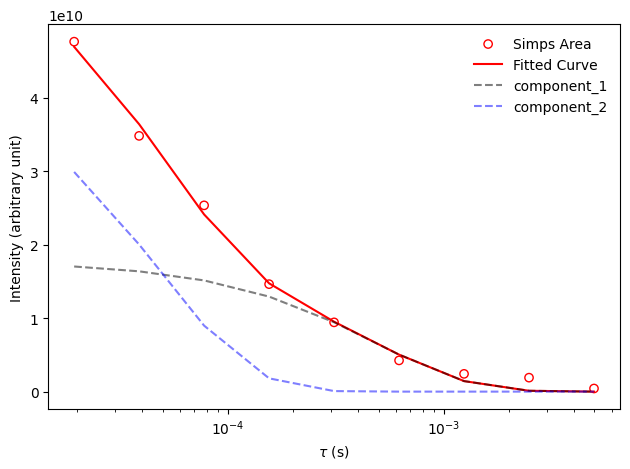

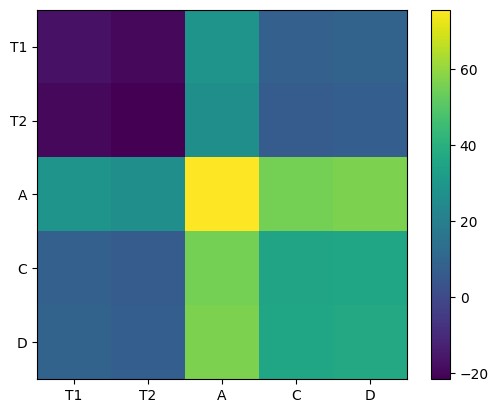

<Figure size 640x480 with 0 Axes>

In [30]:
#T1rho fitting

fig, ax = plt.subplots()
output_lines = []
# Define a list of tuples for the two sets of intensities
intensity_sets = [
    (simps_ints, 'Simps Area', 'Guess Curve', 'Fitted Curve', 'r'),
    (abs_ints, 'Absolute Intensities', 'Guess Abs Int Curve', 'Fitted Curve Absolute Intensity', 'b')
]


# Initial guess parameters

T1_guess = 10.6 * 10**-3

T2_guess = 0.1 * 10**-3





for i, (ints, label, guess_label, fitted_label, color) in enumerate(intensity_sets):
    if i ==0:
        # A_guess = np.max(ints)
        A_guess = 747197159
        
        C_guess = 0.8
        
        D_guess = 0.2
        
        
    
    # Scatter plot
        # ax.scatter(vd_list, ints, color=color, label=label)
    #scatter plot with marker having no face color
        ax.scatter(vd_list, ints, color=color, marker='o', facecolors='none', label=label)
    
    # Guess curve
        guess_integrated_int = t1.di_expdec(vd_list, T1_guess, T2_guess, A_guess, C_guess, D_guess)
        # guess_integrated_int = t1.expdec(vd_list, T1_guess, T2_guess, T3_guess, A_guess, B_guess)
        
        # ax.plot(vd_list, guess_integrated_int, color='brown', linestyle='--', label=guess_label, alpha=0.9)
    
    # Fit the data
        popt, pcov = curve_fit(t1.di_expdec, vd_list, ints, p0=[T1_guess,T2_guess, A_guess, C_guess, D_guess])
    
    # Save the fitted params and uncertainties
        T1_fitted, T2_fitted, A_fitted, C_fitted, D_fitted = popt
        T1_unc, T2_unc, A_unc, C_unc, D_unc = np.sqrt(np.diag(pcov))
        
        #define T1 and T2
        component_1 = A_fitted *  (C_fitted)*np.exp(-vd_list/T1_fitted)
        
        component_2 = A_fitted *  (D_fitted)*np.exp(-vd_list/T2_fitted)
        

    
    # Extract the fitted curve
    
        fitted_curve = t1.di_expdec(vd_list,T1_fitted, T2_fitted, A_fitted, C_fitted, D_fitted)
        ax.plot(vd_list, fitted_curve, linestyle='-', color=color, label=fitted_label)
        # ax.scatter(vd_list, fitted_curve, color='black', marker='o', facecolors='none', label=fitted_label)
        ax.plot(vd_list, component_1, linestyle='--', color='black', alpha=0.5, label='component_1')
        ax.plot(vd_list, component_2, linestyle='--', color='blue', alpha=0.5, label='component_2')

      

    
    # print the fitted parameters and uncertainties
        print(f'T1_{label.lower().replace(" ", "_")}: {T1_fitted} ± {T1_unc}')
        print(f'T2_{label.lower().replace(" ", "_")}: {T2_fitted} ± {T2_unc}')
        
     
    
        print(f'A_{label.lower().replace(" ", "_")}: {A_fitted} ± {A_unc}')
        print(f'D_{label.lower().replace(" ", "_")}: {D_fitted} ± {D_unc}')
        print(f'C_{label.lower().replace(" ", "_")}: {C_fitted} ± {C_unc}')

    
    # #Format the string and append fitted parameters
        
        output_lines.append(f'M0_{label.lower().replace(" ", "_")}: {A_fitted} ± {A_unc}\n')
        output_lines.append(f'T1_{label.lower().replace(" ", "_")}: {T1_fitted} ± {T1_unc}\n')
        output_lines.append(f'T2_{label.lower().replace(" ", "_")}: {T2_fitted} ± {T2_unc}\n')
        

 
        output_lines.append(f'D_{label.lower().replace(" ", "_")}: {D_fitted} ± {D_unc}\n')
        output_lines.append(f'C_{label.lower().replace(" ", "_")}: {C_fitted} ± {C_unc}\n')
       
        #save the fitted params and uncertainties in a text file
        with open(filepath+'di_exp_fitted_params.txt', 'w') as f:
            f.writelines(output_lines)


# ax.semilogy()
ax.semilogx()
ax.legend(loc='best', frameon=False)
ax.set_xlabel(r'$\tau$ (s)')
ax.set_ylabel('Intensity (arbitrary unit)')


#plot the covariance matrix in another figure and label the axes with the fitted parameters


plt.savefig(filepath+'di_exp_T1_fitting.svg', bbox_inches='tight', transparent=True)
plt.tight_layout()
fig, ax = plt.subplots()
im = ax.imshow(np.log(np.abs(pcov)))
ax.set_xticks(np.arange(len(popt)))
ax.set_yticks(np.arange(len(popt)))
ax.set_xticklabels(['T1', 'T2', 'A', 'C', 'D'])
ax.set_yticklabels(['T1', 'T2', 'A', 'C', 'D'])
plt.colorbar(im)
plt.show()
plt.clf()